# Formas de treinamento de modelos

## Regressão linear

Como sabemos, a regressão linear busca encontrar uma equação de coeficientes 'theta' capaz de realizar predições ao computar seus coeficietes com um dado conjunto de entradas 'x':

$$y = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ...+ \theta_{n}x_{n}$$

O valor predito pelo modelo pode ser escrito de forma vetorizada por:

$$ \widehat{y}_{i} = \theta^{T}X_{i} $$

Para encontrar bons valores de 'theta', é necessário usar uma função de custo que verifica o quão bom ou ruim estão as saídas geradas pelo modelo em relação às saídas esperadas. Neste caso, utilizaremos o MSE (do inglês, *mean square error*) devido sua simplicidade em ser minimizado.

$$ MSE = \frac{1}{m}\sum_{i=1}^{m}(\widehat{y} - y_{i}) $$



### Equação normal

A equação normal é um fórmula fechada, que por meio de uma equação, fornece imediatamente os valores de 'theta'.

$$ \widehat{\theta} = (X^{T}X)^{-1}X^{T}Y $$

- X: Matriz de entradas m x n, com m instâncias e n variáveis
- Y: Matriz das saídas esperadas de todo conjunto de dados

A seguir vamos implementar uma equação normal para encontrar os valores de 'theta' para um problema de regressão linear

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
np.random.seed(0)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)  # É adicionado um ruído gaussiano

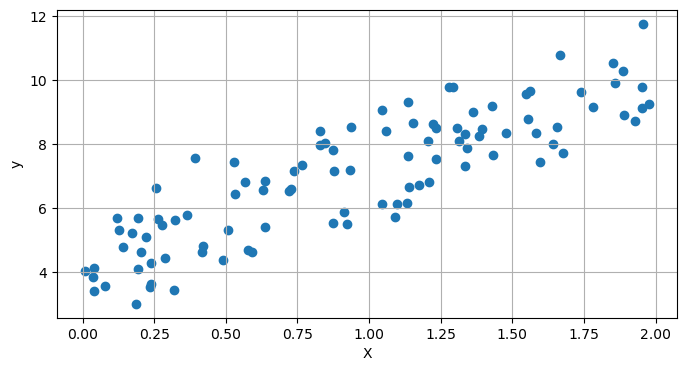

In [120]:
plt.figure(figsize=(8, 4))
plt.grid(True)
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X, y)

In [152]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # Adiciona x0 = 1 para cada instância (bias)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  # numpy aceita '@' como operador de multiplicação de matrizes

print(f"Theta_0 = {theta_best[0]} e theta_1 = {theta_best[1]}")

Theta_0 = [4.22215108] e theta_1 = [2.96846751]


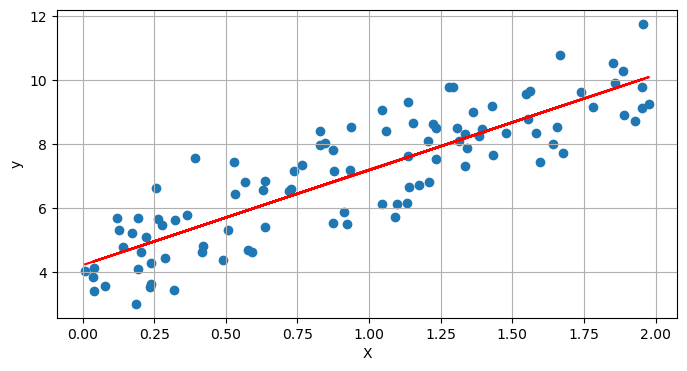

In [122]:
y_pred = X_b @ theta_best  # Valores preditos

plt.figure(figsize=(8, 4))
plt.grid(True)
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X, y, label="Valores reais")
plt.plot(X, y_pred, 'r', label="Valores preditos")

### Gradiente descendente

Calculamos o gradiente de cada n-ésimo 'theta' através das derivadas parciais para minimizar a função de custo, neste caso a 'MSE'. No radiente descendente em lote, é utilizando todo o conjunto de dados para calcular os gradientes.

Isso pode ser feito de forma vetorizada a partir de:

$$ gradientes = \nabla MSE(\theta) = \frac{2}{m}X^{T}(X\theta - \bold{y}) $$

Com os valores dos gradientes de cada valor de 'theta', podemos atualizar seus valores em cada época por meio de:

$$ \widehat{\theta} = \theta - \eta . gradientes $$

In [123]:
def MSE(y_pred, y, size):
    return np.mean((y_pred - y)**2)

In [151]:
epocas = 10
eta = 0.1
m = len(y)
theta = np.random.uniform(0, 1, size = (X_b.shape[1], 1))  # theta0, theta1
errors = []

for i in range(epocas):
    y_pred = X_b @ theta
    errors.append(MSE(y_pred, y, m))
    gradientes = (2 / m) * (X_b.T @ (X_b @ theta - y))
    theta = theta - eta*gradientes
    
print(f"Theta_0 = {theta[0]} e theta_1 = {theta[1]}")

Theta_0 = [3.90220189] e theta_1 = [3.22411594]


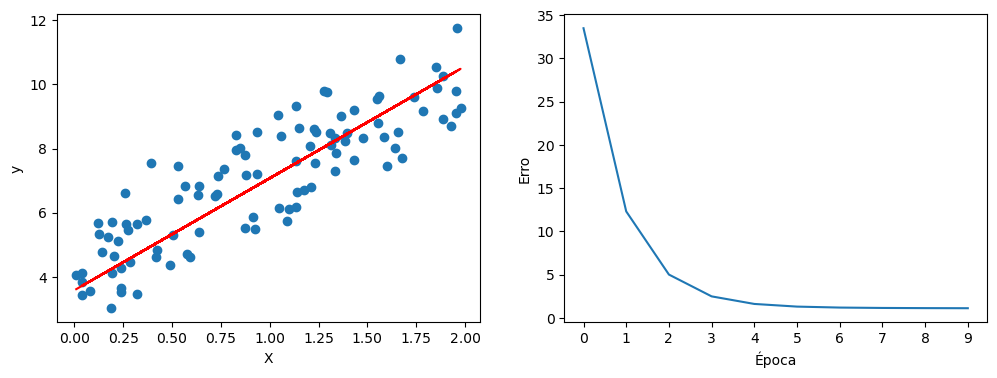

In [150]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].scatter(X, y)  
ax[0].plot(X, y_pred, 'r')
ax[0].set_xlabel("X")
ax[0].set_ylabel("y")

ax[1].plot(range(epocas), errors)  
ax[1].set_xlabel("Época")
ax[1].set_ylabel("Erro")
ax[1].set_xticks(range(epocas));

### Gradiente descendente estocástico